# **Breast Cancer Detection**

**Overview:**
Welcome to the Breast Cancer Detection project, a crucial component of my Data Science internship at Nexus Info. This project centers around building a classification model to predict and detect breast cancer, leveraging a real-world dataset.

**Dataset:** 
The dataset for this project is available at the following link: [Data](https://www.kaggle.com/datasets/bvvkarthik/breast-cancer)

**Description about data:**
The dataset contains of many features related to breat like mean, standard error and worst values of radius, texture, concavity of breast. 

**Methodology:**

1. Data collection
2. Data cleaning
3. Exploratory Data Analysis (EDA)
4. Visualizations
5. Model Building and Training
6. Model Evaluation
7. Conclusions

# Importing Libraries

In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC

# **1.Data Collection**

In [145]:
# Reading the data
dataset = pd.read_csv("/kaggle/input/breast-cancer/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **2. Data Cleaning**

In [146]:
# Check the number of rows and columns
dataset.shape

(569, 32)

In [147]:
# Checking for null values
dataset.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [148]:
# Checking for improper datatypes/formats
dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [149]:
dataset.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [150]:
# Droping unnecessary columns
dataset.drop("id",axis=1,inplace=True)

In [151]:
dataset.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [152]:
# Converting the diagnosis column into numerical values
le = LabelEncoder()
dataset.diagnosis=le.fit_transform(dataset.diagnosis)

In [153]:
dataset.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [178]:
# Removing an outliers if present

z_scores = zscore(dataset)
threshold = 3
outliers = (abs(z_scores) > threshold).all(axis=1)
dataset= dataset[~outliers]

# **3. Exploratory Data Analysis**

In [155]:
# Let's see count of each cancer
dataset.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [156]:
# Let's see a brief summary of each column
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 4. **Data Visualizations**

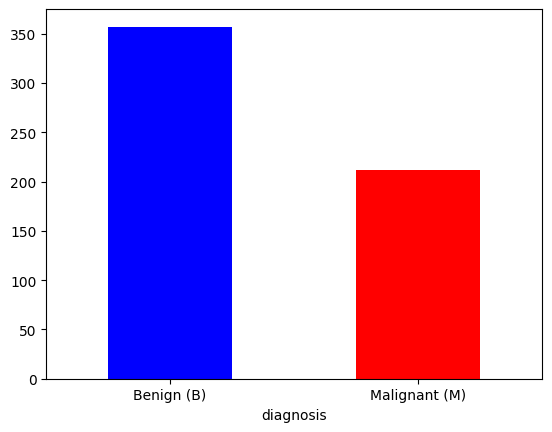

In [157]:
# Plotting bar chart for diagnosis column to visualize the count of each cancer
ax=dataset.diagnosis.value_counts().plot(kind="bar",color=['blue', 'red'])
ax.set_xticklabels(["Benign (B)", "Malignant (M)"], rotation=0)
plt.show()

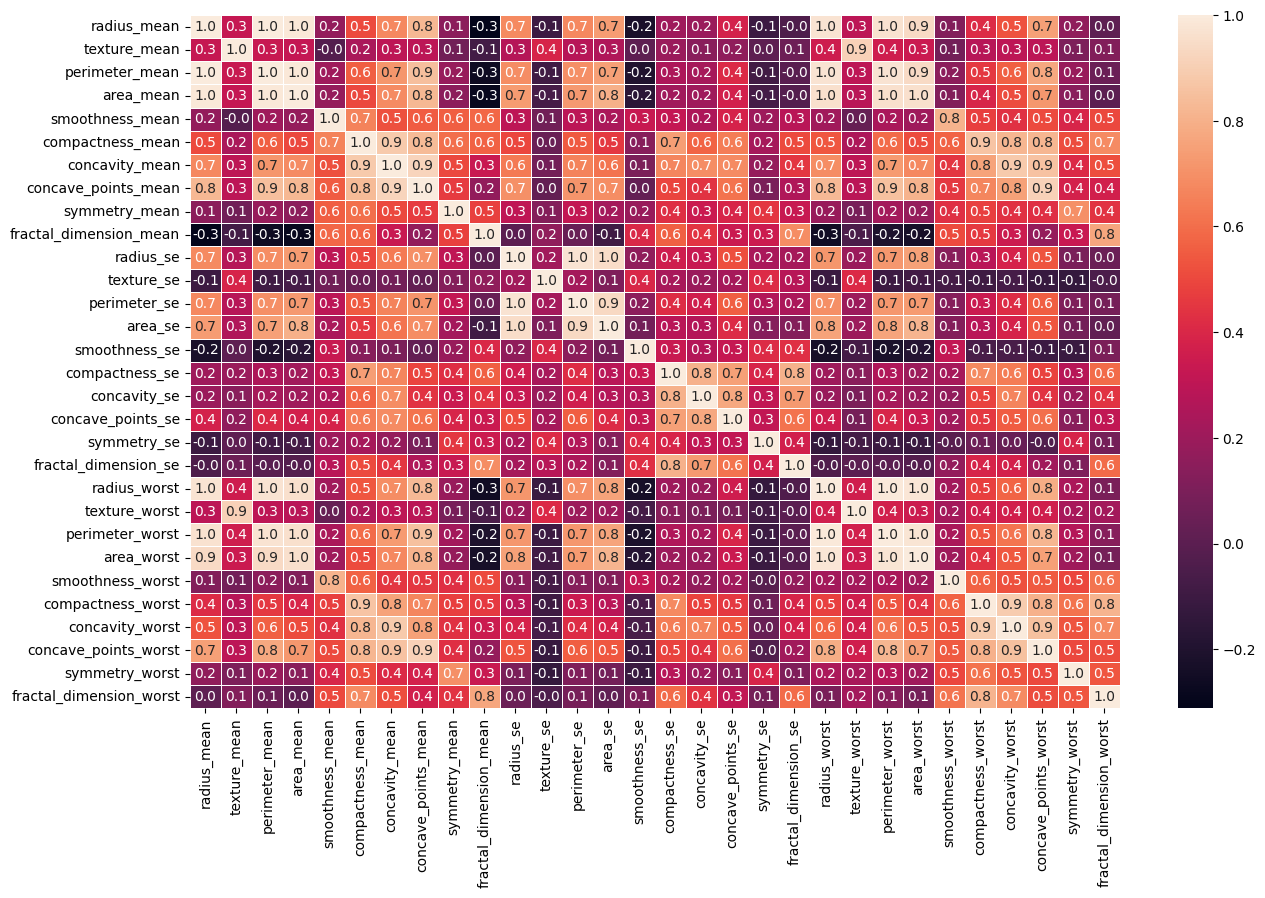

In [158]:
# Let's visualize the correlations between features
plt.figure(figsize=(15,9))
sns.heatmap(dataset.drop("diagnosis",axis=1).corr(),annot=True,linewidth=0.5,fmt='.1f')
plt.show()

# Feature Selecion

* I am going to remove/select the columns based on correlations
* If 2 columns are highly correlated(>=0.9) then, removing one of it doesn't affect model much.
* So, lets drop the unnecessary columns

In [159]:
# Removes one of the columns with high correlations
correlation_matrix = dataset.drop("diagnosis",axis=1).corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= 0.9)]
columns_to_drop

['perimeter_mean',
 'area_mean',
 'concave_points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave_points_worst']

In [160]:
dataset1 = dataset.drop(['perimeter_mean',
 'area_mean',
 'concave_points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave_points_worst'],axis=1)

In [161]:
print("The columns in new dataset are: ",dataset1.shape[1])
print("The columns in original dataset are: ",dataset.shape[1])

The columns in new dataset are:  21
The columns in original dataset are:  31


- We are able to remove 10 unnecessary columns.

# **5. Model building and Training**

In [162]:
# Let's first standardize the features 
ss = StandardScaler()
X = ss.fit_transform(dataset1.drop("diagnosis",axis=1))
Y= dataset1.diagnosis

In [163]:
# Spliting the data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.3)

In [164]:
# Checking how the data is splitted into
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 20)
(171, 20)
(398,)
(171,)


In [165]:
# Building the basic model
svm = SVC(C=1,kernel="rbf")
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9707602339181286

In [166]:
# Using GridSearchCV to improve the performanc and to avoid any overfitting if caused by base model
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
gridcv = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [167]:
# Best parameters for the model
gridcv.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [168]:
# Best accuracy with the best parameters
gridcv.best_score_

0.977373417721519

In [169]:
# Extracting the best model from GridSearchCV
best_svm_model = gridcv.best_estimator_

# **6. Model Evaluation**

In [170]:
# Evaluate the model using f1_score for both basic and bestmodel from gridsearchcv
from sklearn.metrics import f1_score
print("F1_score for basic model with manual parameters:",f1_score(y_test,svm.predict(x_test)))
print("F1_score for best model from gridsearchcv method:",f1_score(y_test,best_svm_model.predict(x_test)))

F1_score for basic model with manual parameters: 0.957983193277311
F1_score for best model from gridsearchcv method: 0.957983193277311


In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
# Confusion matrix for basic model
cm = confusion_matrix(y_test,svm.predict(x_test))
cm

array([[109,   3],
       [  2,  57]])

<Axes: >

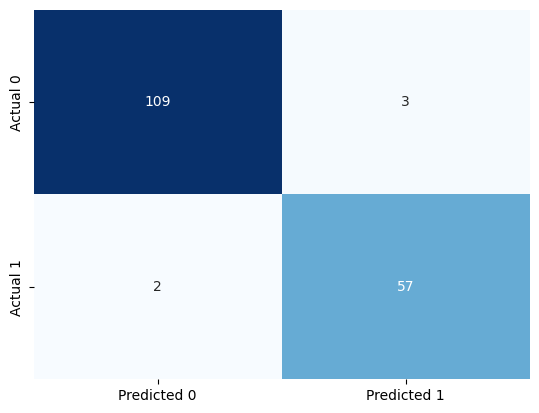

In [173]:
#Plotting heatmap for basic model
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [174]:
gridcm=confusion_matrix(y_test,best_svm_model.predict(x_test))

<Axes: >

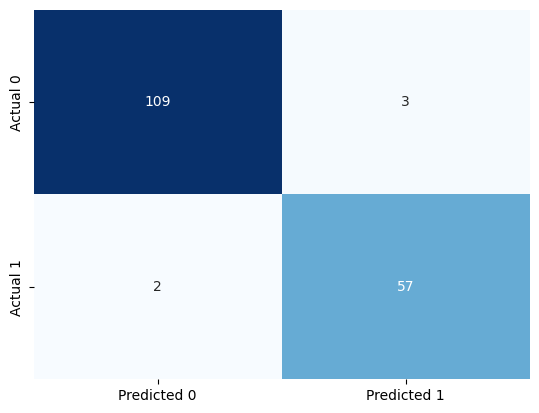

In [175]:
sns.heatmap(gridcm,annot=True,fmt='g',cbar=False,cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [176]:
# All metrics for basic model
print(classification_report(y_test,svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [177]:
# All metrics for best model from gridsearhcv
print(classification_report(y_test,best_svm_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# **7. Conclusions**

* We can observe that in both model i.e basic and using gridsearchcv we are getting same accuracy

* So, we can you any of the model without any problem.

* Finally we built a classification model with an accuracy of 97% in order to classify the type of breast cancer using svm model